# Imports

In [ ]:
import sys
from pathlib import Path
sys.path.append(str(Path("figure_supplementary.ipynb").resolve().parents[1]))

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import matplotlib.transforms as mtransforms
import os

import bb_rhythm.plotting
import bb_rhythm.rhythm

import path_settings

In [48]:
sns.set_style("ticks")
sns.set_palette(sns.color_palette("colorblind"))
matplotlib.rcParams.update({'font.size': 5, 'ytick.major.size': 1,
                            'ytick.major.width': 0.4, 'font.sans-serif': 'Arial'})

# Data

In [4]:
# cosinor fit data for period 2016
cosinor_df_2016 = pd.read_csv(path_settings.COSINOR_DF_PATH_2016)

# define bees being circadian with results of zero amplitude test being < 0.05
cosinor_df_2016["is_circadian"] = cosinor_df_2016.p_value < 0.05

In [36]:
# cosinor fit data for period 2019
cosinor_df_2019 = pd.read_csv(path_settings.COSINOR_DF_PATH_2019)

# define bees being circadian with results of zero amplitude test being < 0.05
cosinor_df_2019["is_circadian"] = cosinor_df_2019.p_value < 0.05

## Number of bees

In [53]:
palette = sns.color_palette()

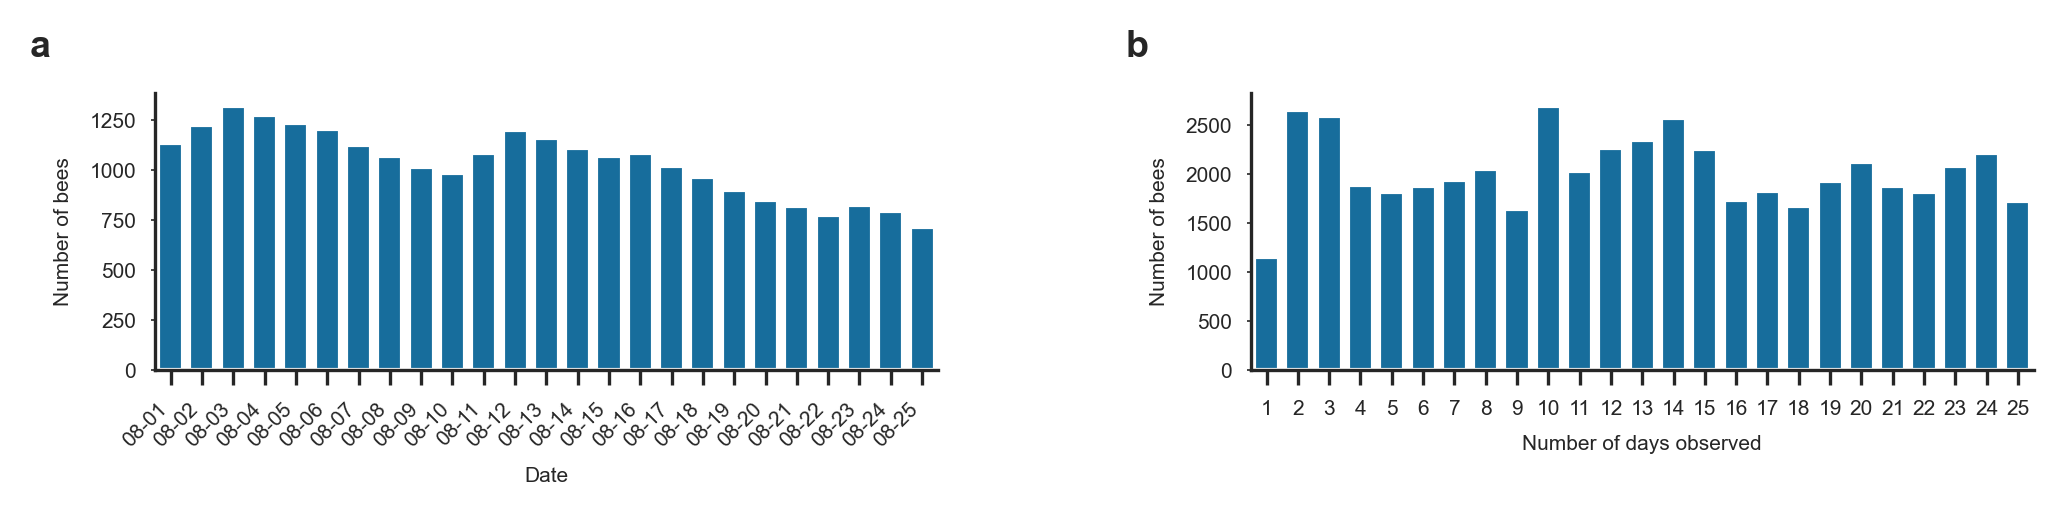

In [56]:
# create figure
fig, axs = plt.subplots(1, 2, figsize=(8.08, 1.2), dpi=300, gridspec_kw={'wspace': 0.4})

# plot number of bees per day
sns.barplot(data=cosinor_df_2016, x="date", y="bee_id", ax=axs[0], estimator="count", errorbar=None, color=palette[0])
axs[0].set(xlabel="Date", ylabel="Number of bees")
axs[0].set_xticks(axs[0].get_xticks())
x_dates = cosinor_df_2016.date.dt.strftime('%m-%d').sort_values().unique()
axs[0].set_xticklabels(x_dates, rotation=45, ha='right')
sns.despine(ax=axs[0])

# plot how many bees have been observed how many dates
sns.barplot(data=cosinor_df_2016.groupby("bee_id")["date"].count().reset_index(), y="bee_id", x="date", ax=axs[1], errorbar=None, color=palette[0])
axs[1].set(xlabel="Number of days observed", ylabel="Number of bees")
sns.despine(ax=axs[1])

# label subplots
labels=["a", "b"]
i = 0
for ax in axs.reshape(-1):
    trans = mtransforms.ScaledTranslation(-30/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, labels[i], transform=ax.transAxes + trans,
            fontsize='9', va='bottom', fontfamily='Arial', fontweight='bold')
    i += 1

# save fig
plt.savefig(os.path.join("imgs", "number_of_bees_2016_app.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "number_of_bees_2016_app.png"), bbox_inches="tight")

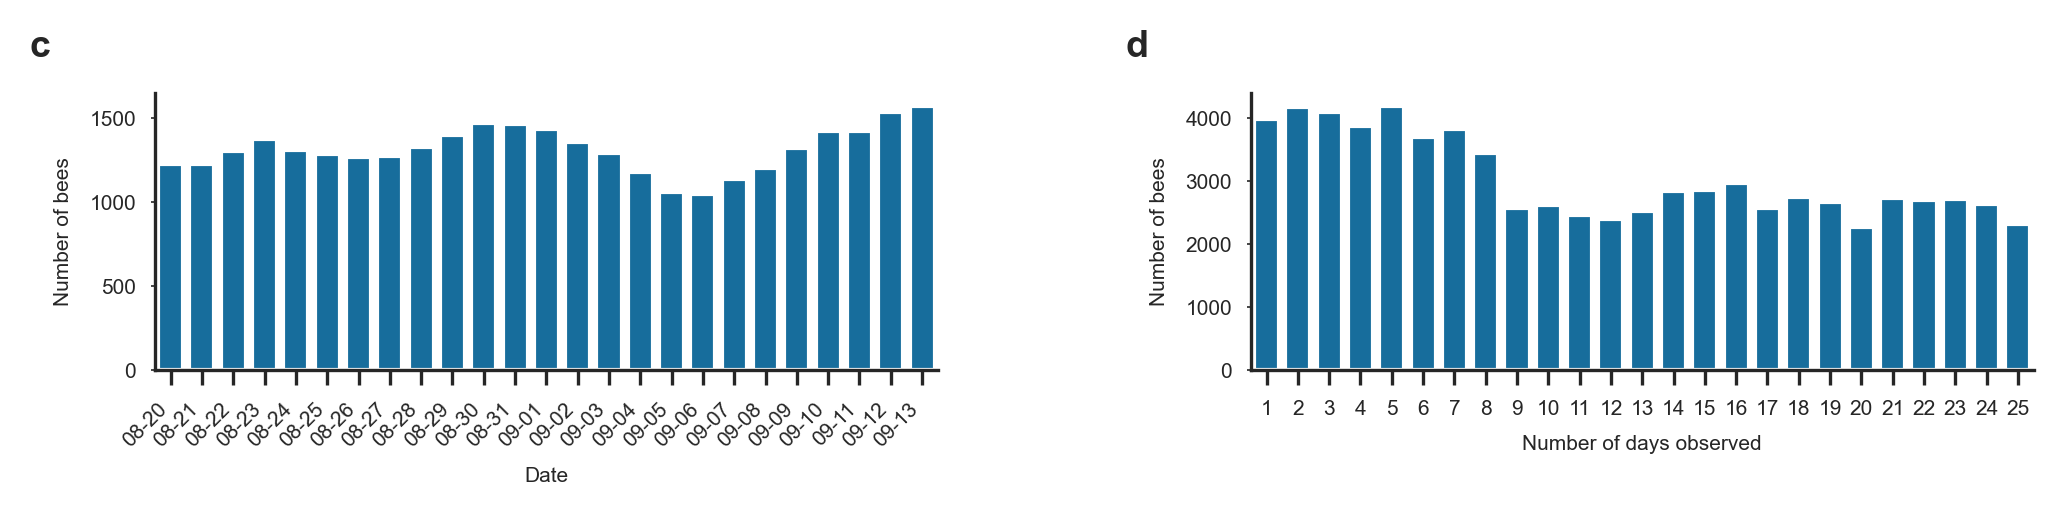

In [52]:
# create figure
fig, axs = plt.subplots(1, 2, figsize=(8.08, 1.2), dpi=300, gridspec_kw={'wspace': 0.4})

# plot number of bees per day
cosinor_df_2019.date = pd.to_datetime(cosinor_df_2019.date)
sns.barplot(data=cosinor_df_2019, x="date", y="bee_id", ax=axs[0], estimator="count", errorbar=None, color=palette[0])
axs[0].set(xlabel="Date", ylabel="Number of bees")
axs[0].set_xticks(axs[0].get_xticks())
x_dates = cosinor_df_2019.date.dt.strftime('%m-%d').sort_values().unique()
axs[0].set_xticklabels(x_dates, rotation=45, ha='right')
sns.despine(ax=axs[0])

# plot how many bees have been observed how many dates
sns.barplot(data=cosinor_df_2019.groupby("bee_id")["date"].count().reset_index(), y="bee_id", x="date", ax=axs[1], errorbar=None, color=palette[0])
axs[1].set(xlabel="Number of days observed", ylabel="Number of bees")
sns.despine(ax=axs[1])

# label subplots
labels=["c", "d"]
i = 0
for ax in axs.reshape(-1):
    trans = mtransforms.ScaledTranslation(-30/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, labels[i], transform=ax.transAxes + trans,
            fontsize='9', va='bottom', fontfamily='Arial', fontweight='bold')
    i += 1

# save fig
plt.savefig(os.path.join("imgs", "number_of_bees_2019_app.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "number_of_bees_2019_app.png"), bbox_inches="tight")

## Share of rhythmic bees per age

In [57]:
# bar plot dataframe
df_bar_2016 = cosinor_df_2016.groupby(["age"]).agg(
    no=("is_circadian", lambda x: 100),
    yes=("is_circadian", lambda x: x.sum() / x.count() * 100),
).rename(columns={"yes": "Circadian", "no": "Non-circadian"}).reset_index()

df_bar_2019 = cosinor_df_2019.groupby(["age"]).agg(
    no=("is_circadian", lambda x: 100),
    yes=("is_circadian", lambda x: x.sum() / x.count() * 100),
).rename(columns={"yes": "Circadian", "no": "Non-circadian"}).reset_index()

In [58]:
palette = bb_rhythm.plotting.create_age_color_palette(
        sorted(df_bar_2016["age"].unique()), "age", df_bar_2016
    )

/tmp/ipykernel_5909/1613457338.py:20: UserWarning: The palette list has more values (58) than needed (48), which may not be intended.
  sns.barplot(data=df_bar_2019, x="age", y="Non-circadian", ax=axs[1], hue="age", legend=False, palette=palette, alpha=0.5, orient="v")
/tmp/ipykernel_5909/1613457338.py:21: UserWarning: The palette list has more values (58) than needed (48), which may not be intended.
  sns.barplot(data=df_bar_2019, x="age", y="Circadian", ax=axs[1], hue="age", legend=False, palette=palette, orient="v", edgecolor=".9")


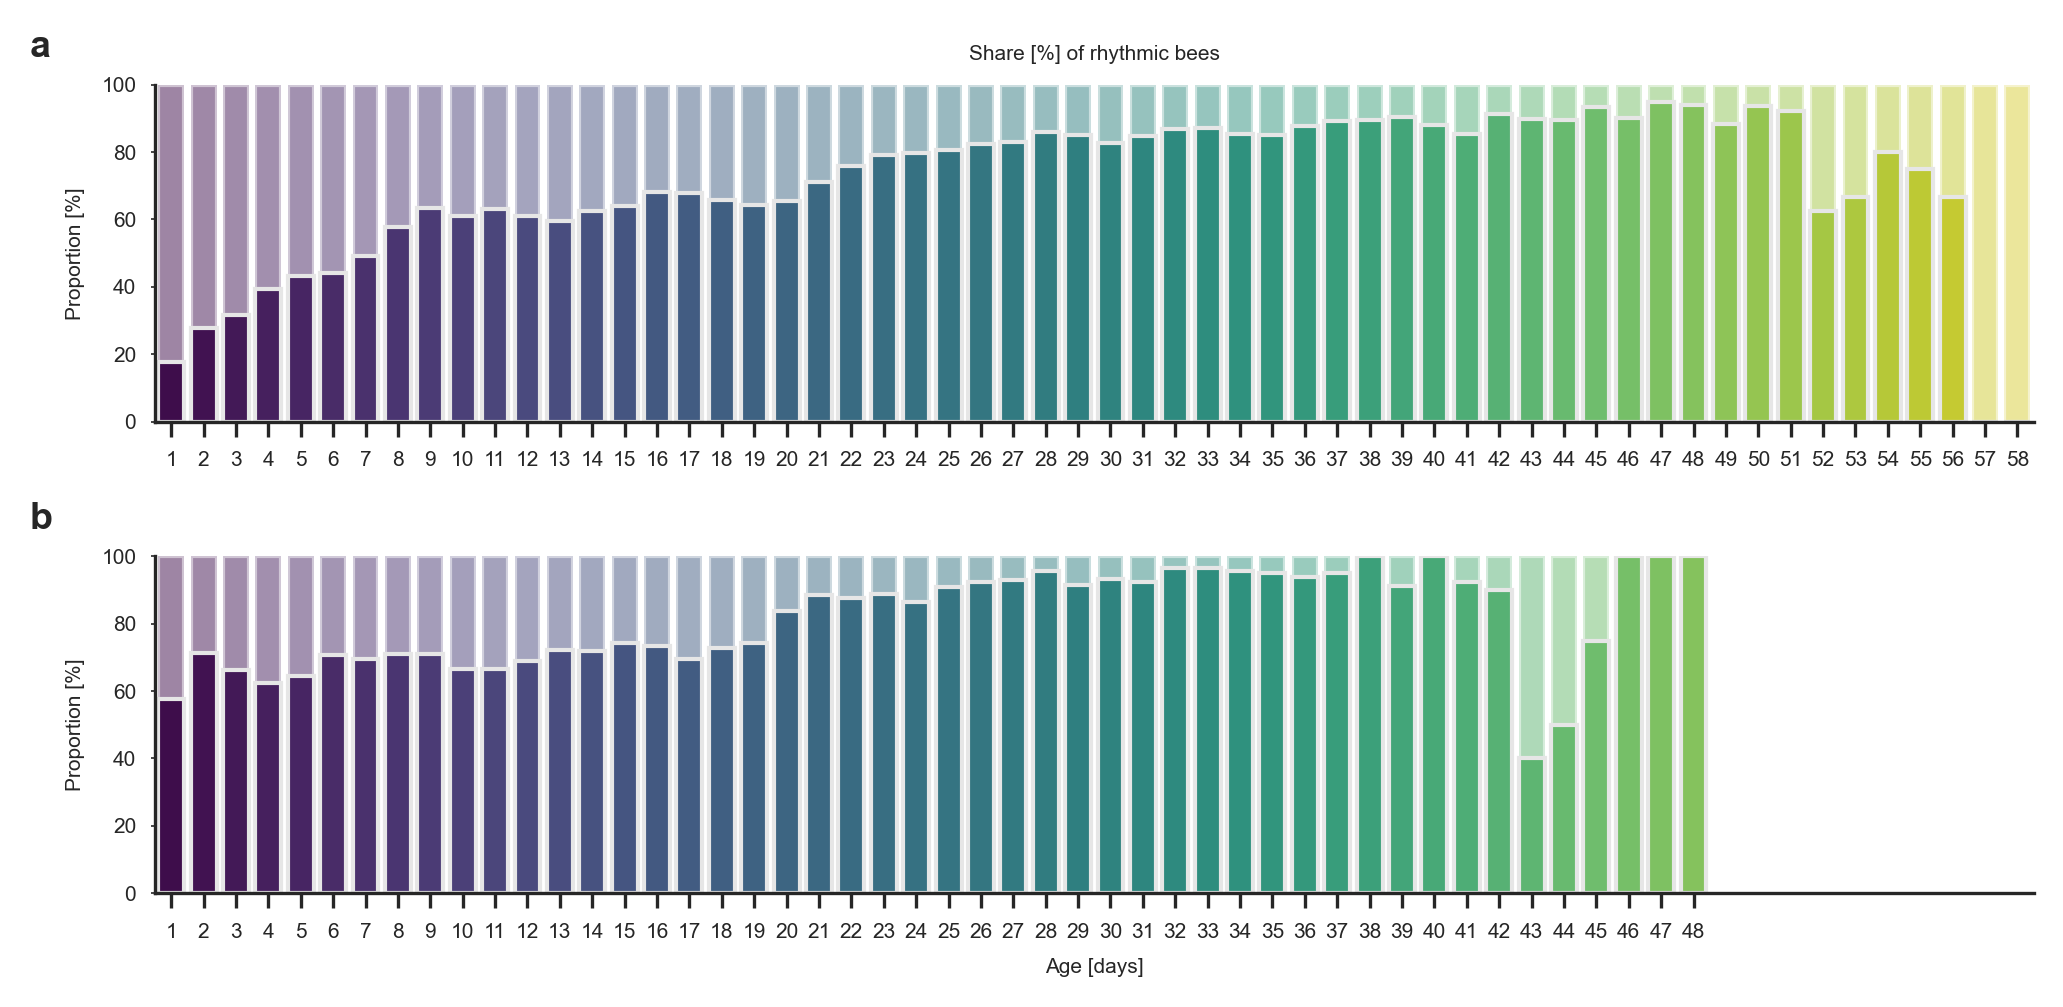

In [59]:
fig, axs = plt.subplots(2, 1, figsize=(8.08, 3.5), dpi=300, gridspec_kw={'hspace': 0.4}, sharey=True)

# barplot
sns.barplot(data=df_bar_2016, x="age", y="Non-circadian", ax=axs[0], hue="age", legend=False, palette=palette, alpha=0.5, orient="v")
sns.barplot(data=df_bar_2016, x="age", y="Circadian", ax=axs[0], hue="age", legend=False, palette=palette, orient="v", edgecolor=".9")

# x-axis settings
axs[0].set_xlabel("")

# y-axis settings
axs[0].set_ylabel("Proportion [%]")
axs[0].set_ylim(0, 100.0)

# figure settings
axs[0].set_title("Share [%] of rhythmic bees", fontsize=rcParams['axes.labelsize'])
sns.despine(ax=axs[0])
axs[0].grid(False)

# barplot
sns.barplot(data=df_bar_2019, x="age", y="Non-circadian", ax=axs[1], hue="age", legend=False, palette=palette, alpha=0.5, orient="v")
sns.barplot(data=df_bar_2019, x="age", y="Circadian", ax=axs[1], hue="age", legend=False, palette=palette, orient="v", edgecolor=".9")

# x-axis settings
axs[1].set_xlabel("Age [days]")
axs[1].set_xlim(-0.5, 57.5)

# y-axis settings
axs[1].set_ylabel("Proportion [%]")
axs[1].set_ylim(0, 100.0)

# figure settings
sns.despine(ax=axs[1])
axs[1].grid(False)

# add subplot labels
labels=["a", "b"]
i = 0
for ax in axs.reshape(-1):
    trans = mtransforms.ScaledTranslation(-30/72, 5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, labels[i], transform=ax.transAxes + trans,
            fontsize='9', va='bottom', fontfamily='Arial', fontweight='bold')
    i += 1
    
# save fig
plt.savefig(os.path.join("imgs", "share_of_rhythmic_bees_app.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "share_of_rhythmic_bees_app.png"), bbox_inches="tight")

## Rebuttal Analyses

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/mean_velocity_2019.csv", parse_dates=["date"])

df['date'] = pd.to_datetime(df['date'])
age_bins = pd.qcut(df['age'], 3, labels=["0 - 12 Days", "12 - 24 Days", "24 - 48 Days"])
df['age_bin'] = age_bins
grouped = df.groupby(['age_bin', "date"])["velocity"].mean().reset_index()

bin_labels = ["0 - 12 Days", "12 - 24 Days", "24 - 48 Days"]

plt.figure(figsize=(10, 6))
ymax_total = 0  # For annotation

for i, bin_label in enumerate(bin_labels):
    bin_df = grouped[grouped['age_bin'] == bin_label].sort_values('date')
    bin_df = bin_df.drop_duplicates(subset='date')
    if bin_df['date'].nunique() < 2:
        print(f"Skipping bin {bin_label}: not enough unique timestamps.")
        continue

    velocities = bin_df['velocity'].to_numpy()
    times = bin_df['date'].to_numpy()

    dt_hours = np.median(np.diff(bin_df['date']).astype('timedelta64[s]').astype(float)) / 3600
    if dt_hours == 0 or np.isnan(dt_hours):
        print(f"Skipping bin {bin_label}: dt_hours is zero or NaN.")
        continue
    fs = 1 / dt_hours

    velocities = velocities[~np.isnan(velocities)]
    N = len(velocities)
    if N == 0:
        print(f"Skipping bin {bin_label}: no valid velocities.")
        continue

    freqs = np.fft.rfftfreq(N, d=1/fs)
    spectrum = np.abs(np.fft.rfft(velocities))
    with np.errstate(divide='ignore'):
        periods = 1 / freqs
    valid = freqs > 0

    color = sns.color_palette("crest", 3)[i]
    plt.plot(periods[valid], spectrum[valid], color=color, label=bin_label)
    ymax_total = max(ymax_total, np.max(spectrum[valid]))

plt.axvline(24, color='gray', linestyle='--')
plt.text(24, ymax_total * 0.95, '24h', color='gray', ha='right', va='top', rotation=0)
plt.xscale('log')
plt.ylabel('Magnitude')
plt.xlabel('Period [hours]')
plt.legend(title='Age Bin')
plt.tight_layout()
plt.show()